In [1]:
import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import controller 

In [2]:
ctrl = controller.controller()

In [3]:
Q = np.array(
    [
        [1., 0.],
        [0., 1.]
    ]
)
F = np.array([
    [1.,0.],
    [0.,1.]
])
R = 0.1

ctrl.set_cost(Q,R,F)

In [4]:
CL = 2

A = np.array(
    [
        [0. , 0.1],
        [0. , 1.]
    ]
    )
B = np.array(
    [
        [0.],
        [0.5]
    ]
)

def f(x0,u0):
    return A @ x0 + B @ u0

def matrix_iterator(x0,u0):
    A = np.array(
    [
        [0. , 0.1],
        [0. , 1.]
    ]
    )
    B = np.array(
        [
            [0.],
            [0.5]
        ]
    )

    f0 = f(x0,u0)

    return A,B,f0

x0 = np.array([[20.,-20.]]).reshape(-1,1)

xd = np.array(
    [
        [0],
        [0.]
    ]
)

u0 = np.array(
    [
        [0]
    ]
)

ctrl.f = f

In [5]:
ctrl.pred_horizon = 20
ctrl.control_horizon = 3
xlist = [x0]
ulist = [u0]
for i in range(100):
    A,B,f0 = matrix_iterator(x0,u0)
    ctrl.update_dynamics(A,x0,B,u0,f0)
    ctrl.discretize(1.0)
    ctrl.setup_qp_linear(x0,u0,xd)
    u = ctrl.solve_qp(x0)
    for j in range(ctrl.control_horizon):
        u0 = u[j:j+1].reshape(-1,1)
        x0 = ctrl.apply_control(x0,u0)
        xlist.append(x0)
        ulist.append(u0)
    #print('stepped')


In [6]:
import matplotlib.pyplot as plt

In [7]:
xm = np.array(xlist).squeeze(-1)
print(xm.shape)

(301, 2)


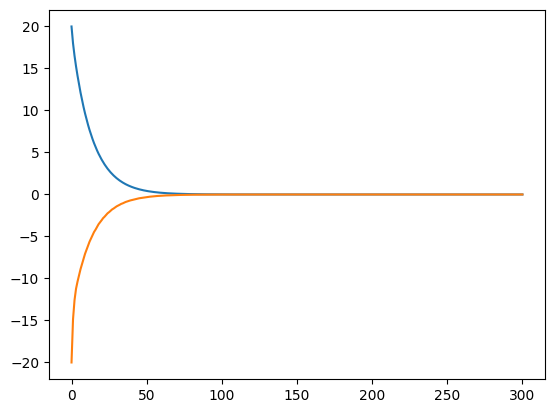

In [8]:
plt.plot(xm[:,0])
plt.plot(xm[:,1])

In [9]:
u_tilde = u.reshape(-1,2)

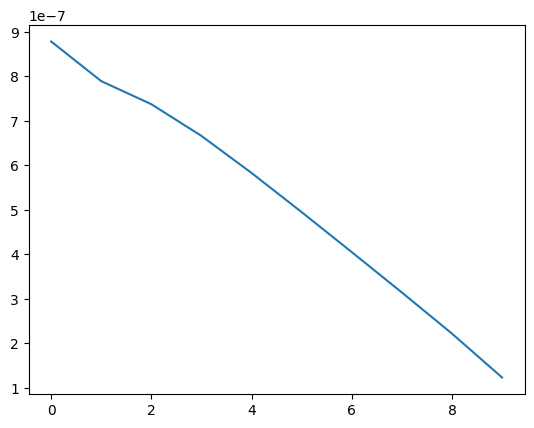

In [10]:
plt.plot(u_tilde[:,0])

In [11]:
u_tilde[6,0]

4.0503266263497114e-07